In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
df2 = pd.read_csv("/content/14-05-2021-TO-13-05-2022FEDERALBNKALLN.csv")
# Dataset is now stored in a Pandas Dataframe
data=df2[['Date','Open Price', 'High Price','Low Price','Close Price']]
x= data['Close Price']

In [102]:
data.head()

,Date,Open Price,High Price,Low Price,Close Price
0,14-May-2021,82.45,82.85,79.05,79.65
1,17-May-2021,80.80,83.50,77.65,81.55
2,18-May-2021,84.00,86.40,83.10,84.35
3,19-May-2021,84.30,85.40,83.30,84.40
4,20-May-2021,84.70,85.50,82.85,83.45


In [103]:
data.corr()

,Open Price,High Price,Low Price,Close Price
Open Price,1.000000,0.985747,0.984370,0.968785
High Price,0.985747,1.000000,0.980165,0.989129
Low Price,0.984370,0.980165,1.000000,0.984035
Close Price,0.968785,0.989129,0.984035,1.000000


In [104]:
data.describe()

,Open Price,High Price,Low Price,Close Price
count,249.000000,249.000000,249.000000,249.000000
mean,90.921888,92.087149,89.397390,90.665060
std,6.817689,7.018581,6.692506,6.854326
min,78.000000,78.650000,77.500000,77.950000
25%,85.700000,86.400000,84.250000,85.300000
50%,89.150000,90.300000,87.750000,89.150000
75%,97.400000,98.700000,96.000000,97.400000
max,105.000000,107.650000,102.300000,104.450000


#Hypothesis testing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



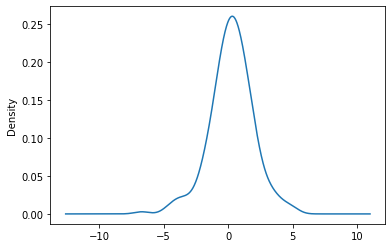

In [105]:
data['diff']=data['Open Price']-data['Close Price']
data['diff'].plot.kde()

Distribution curve for the variable difference of open price and the close price: -

The above distribution curve indicates that it is symmetrical, because there is no amount of tail present in the either side. 
The variable difference can be assumed to be normally distributed. To check the above hypothesis, we can use a parametric test. Test name: - Paired sample t-test.


In [106]:
from scipy.stats import ttest_1samp, ttest_rel
ttest_rel(data['Open Price'],data['Close Price'])

Ttest_relResult(statistic=2.372137768822742, pvalue=0.018449424092120182)

the p value from Python is 0.0184 which is less than 0.05 and therefore the null hypothesis is rejected which means there is significant difference in the open price and the close price.

#Statistical Data Analysis

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         249 non-null    object 
 1   Open Price   249 non-null    float64
 2   High Price   249 non-null    float64
 3   Low Price    249 non-null    float64
 4   Close Price  249 non-null    float64
 5   diff         249 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.8+ KB


In [108]:
data.describe()

,Open Price,High Price,Low Price,Close Price,diff
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,90.921888,92.087149,89.397390,90.665060,0.256827
std,6.817689,7.018581,6.692506,6.854326,1.708445
min,78.000000,78.650000,77.500000,77.950000,-6.700000
25%,85.700000,86.400000,84.250000,85.300000,-0.650000
50%,89.150000,90.300000,87.750000,89.150000,0.300000
75%,97.400000,98.700000,96.000000,97.400000,1.300000
max,105.000000,107.650000,102.300000,104.450000,5.100000


Here, we are working on the variable Close Price of the stock. The variable is stored in the object, x. Firstly a line chart has been drawn representing the close price of the Federal bank stock price.

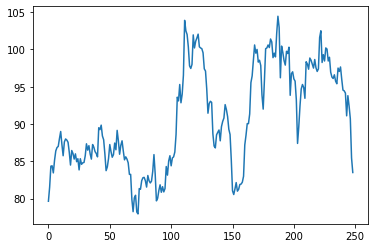

In [109]:
plt.plot(data['Close Price'])
plt.show()

In the above graph it can be clearly observed that there is no trend.
In statistical analysis of a stock, returns play an important role. The percentage change in the closing price between two days is the return. It can be calculated by using following formula: -
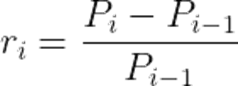
 

In python, the pct change () method returns a Dataframe with the percentage difference between each row's values and the previous row's values, by default.


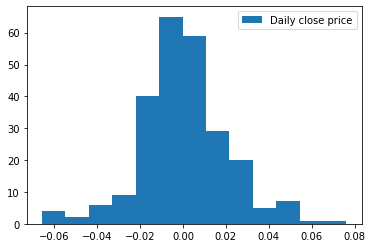

In [110]:
returns = x.pct_change(1).dropna() 
plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

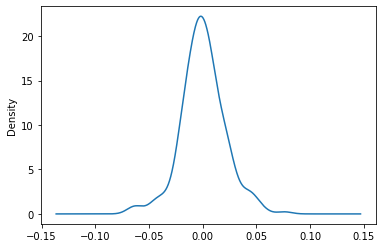

In [111]:
returns.plot.density()

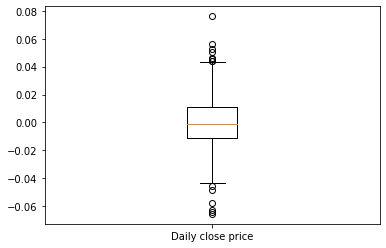

In [112]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show()

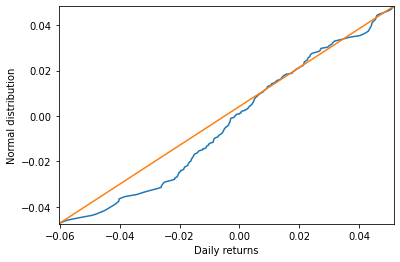

In [113]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

The blue line is what we receive from our data, whereas the straight line is what we expect from a normal distribution.
It is clear from the graph that the returns are slightly normal distributed as it overlaps the orange line.

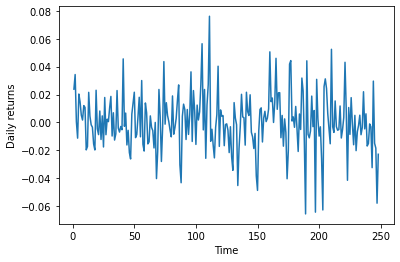

In [114]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

It is clear from the graph that there was normal volatility during the given time frame. Hence, the time series was stationary.

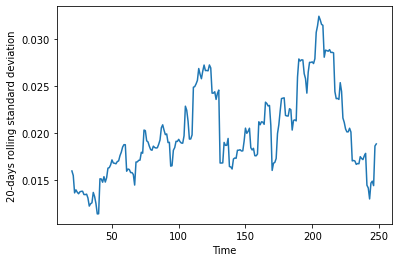

In [115]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

Above is the 20-days rolling standard deviation chart, which clearly shows that there were little spikes and oscillations during the given time frame. 
 


In [116]:
np.mean(returns)

0.00040268374249162556

In [117]:
np.std(returns)

0.020606253557374218

In [118]:
np.quantile(returns,0.25)

-0.010961839405335017

In [119]:
np.quantile(returns,0.5)

-0.0011434488797417708

In [120]:
np.quantile(returns,0.75)

0.010959823609630215

In [121]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
skew(returns)

0.026229718621429504

Skewness tells the measure of asymmetry of a distribution. Since the value of skewness is close to 0. It means the returns are symmetrical in nature.

In [122]:
skewtest(returns)

SkewtestResult(statistic=0.17337233825804826, pvalue=0.8623587667070112)

The p-value of the test is greater than 0.05, so we can assume that the distribution is symmetrical.

In [123]:
kurtosis(returns)

1.4342958541361464

Kurtosis tells us the peakedness of the distribution. The Kurtosis value is greater than 1, it means the distribution is too peaked.

In [124]:
kurtosistest(returns)

KurtosistestResult(statistic=3.195716169820148, pvalue=0.0013948425154417267)

Here the p-value is less than 0.05, so the null hypothesis is rejected. The kurtosis is not the same as a normal distribution.

#MODEL DEVELOPMENT

In [125]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open Price"], high=data["High Price"],
                                        low=data["Low Price"], close=data["Close Price"])])
figure.update_layout(title = "Fedral Bank Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

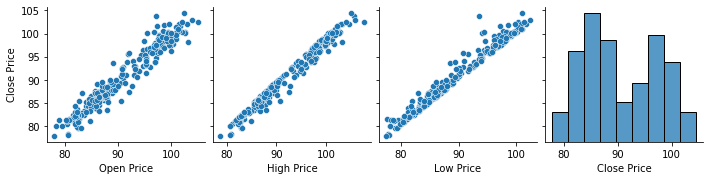

In [126]:
import seaborn as sns
sns.pairplot(data, x_vars=['Open Price', 'High Price', 'Low Price', 'Close Price'], y_vars='Close Price')


In [128]:
pip install AutoTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 5.4 MB/s 


In [ ]:
from autots import AutoTS
model = AutoTS(forecast_length=5, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close Price', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 10 with model DatepartRegression in generation 0 of 10
Epoch 1/50
8/8 [==============================] - 5s 5ms/step - loss: 0.3920
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3854
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3766
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3627
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3526
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3428
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3253
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3115
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3025
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2933
Epoch 11/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2900
Epoch 12/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2913
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 38 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/zni5r2uk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/pppqpo0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81007', 'data', 'file=/tmp/tmpjl9_res0/zni5r2uk.json', 'init=/tmp/tmpjl9_res0/pppqpo0y.json', 'output', 'file=/tmp/tmpt4uo0v1r/prophet_model-20220831111208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/7_yuw22s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/c4yyo9il.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35394', 'data', 'file=/tmp/tmpjl9_res0/7_yuw22s.json', 'init=/tmp/tmpjl9_res0/c4yyo9il.json', 'output', 'file=/tmp/tmp_6o75gff/prophet_model-20220831111211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 57 with model FBProphet in generation 0 of 10


11:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 58 with model SeasonalNaive in generation 0 of 10
Model Number: 59 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError('X has 54 features, but RandomForestRegressor is expecting 58 features as input.') in model 59: DatepartRegression
Model Number: 60 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_1
- weekdayofmonth_3
- weekdayofmonth_4
- weekdayofmonth_5




Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 65: LastValueNaive
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:798: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1199: RuntimeWarning:

invalid value encountered in multiply

INFO:prophet:Disabling yearly seas

Model Number: 71 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18587', 'data', 'file=/tmp/tmpjl9_res0/2xktur_k.json', 'init=/tmp/tmpjl9_res0/snsex7lz.json', 'output', 'file=/tmp/tmpvgjcgq45/prophet_model-20220831111214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 72 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 73: UnobservedComponents
Model Number: 74 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 10
Model Number: 77 with model WindowRegression in generation 0 of 10
Model Number: 78 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 78: DatepartRegression
Model Number: 79 with model Un

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:545: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:546: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 116 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 116: WindowRegression
Model Number: 117 with model MultivariateRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 118 with model Theta in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 118: Theta
Model Number: 119 with model UnobservedComponents in generation 0 of 10
Model Number: 120 with model ConstantNaive in generation 0 of 10
Model Number: 121 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 121: MultivariateRegression
Model Number: 122 with model SeasonalNaive in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Model Number: 124 with model LastValueNaive in generation 0 of 10
Model Number: 125 with model SeasonalNaive in generation 0 of 10
Model Number: 126 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126: DatepartRegression
Model Number: 127 with model GluonTS in generation 0 of 10
T

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=6.45737e-25): result may not be accurate.



Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 131: GLM
Model Number: 132 with model AverageValueNaive in generation 0 of 10
Model Number: 133 with model LastValueNaive in generation 0 of 10
Model Number: 134 with model MultivariateRegression in generation 0 of 10
Epoch 1/100
8/8 [==============================] - 7s 28ms/step - loss: 0.2765
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 0.2369
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 0.2367
Epoch 4/100
8/8 [==============================] - 0s 26ms/step - loss: 0.2302
Epoch 5/100
8/8 [==============================] - 0s 23ms/step - loss: 0.2266
Epoch 6/100
8/8 [==============================] - 0s 23ms/step - loss: 0.2181
Epoch 7/100
8/8 [==============================] - 0s 24ms/step - loss: 0.2076
Epoch 8/100
8/8 [==============================] - 0s 24ms/step - loss: 0.2011
Epoch 9/100
8/8 [==============================] - 0s 28ms/ste

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=6.45737e-25): result may not be accurate.



Model Number: 138 with model ConstantNaive in generation 0 of 10
Model Number: 139 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 139: VECM
Model Number: 140 with model MultivariateMotif in generation 0 of 10
Model Number: 141 with model SectionalMotif in generation 0 of 10
Model Number: 142 with model UnobservedComponents in generation 0 of 10
Model Number: 143 with model SectionalMotif in generation 0 of 10
Model Number: 144 with model UnobservedComponents in generation 0 of 10
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model ETS in generation 0 of 10
Model Number: 147 with model LastValueNaive in generation 0 of 10
Model Number: 148 with model UnobservedComponents in generation 0 of 10
Model Number: 149 with model ETS in generation 0 of 10
Model Number: 150 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function retur

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 154: GluonTS
Model Number: 155 with model SeasonalNaive in generation 0 of 10
Model Number: 156 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 156: ARIMA
Model Number: 157 with model ConstantNaive in generation 0 of 10
Model Number: 158 with model ARIMA in generation 0 of 10
Model Number: 159 with model LastValueNaive in generation 0 of 10
Model Number: 160 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 160: GluonTS
Model Number: 161 with model LastValueNaive in generation 0 of 10
Model Number: 162 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 162: ARCH
Model Number: 163 with

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsm

Model Number: 177 with model GLS in generation 0 of 10
Model Number: 178 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 178: VAR
Model Number: 179 with model UnivariateMotif in generation 0 of 10
Model Number: 180 with model MultivariateMotif in generation 0 of 10
Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model UnivariateMotif in generation 0 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 182: UnivariateMotif
Model Number: 183 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 183: ARDL


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_1
- weekdayofmonth_3
- weekdayofmonth_4
- weekdayofmonth_5




New Generation: 1 of 10
Model Number: 184 with model GLS in generation 1 of 10
Model Number: 185 with model ETS in generation 1 of 10
Model Number: 186 with model AverageValueNaive in generation 1 of 10
Model Number: 187 with model Theta in generation 1 of 10
Model Number: 188 with model ConstantNaive in generation 1 of 10
Model Number: 189 with model LastValueNaive in generation 1 of 10
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 189: LastValueNaive
Model Number: 190 with model SectionalMotif in generation 1 of 10
Model Number: 191 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 191: MultivariateRegression
Model Number: 192 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 192: UnobservedComp

/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 194 with model AverageValueNaive in generation 1 of 10
Model Number: 195 with model DatepartRegression in generation 1 of 10
Model Number: 196 with model AverageValueNaive in generation 1 of 10
Model Number: 197 with model SeasonalNaive in generation 1 of 10
Model Number: 198 with model Theta in generation 1 of 10
Model Number: 199 with model ARIMA in generation 1 of 10
Model Number: 200 with model DatepartRegression in generation 1 of 10
Epoch 1/50
8/8 [==============================] - 5s 6ms/step - loss: 0.3920
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3854
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3766
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3628
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3526
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3428
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3253
Epoc

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce



Model Number: 209 with model GLS in generation 1 of 10
Model Number: 210 with model DatepartRegression in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 211 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 211: DatepartRegression
Model Number: 212 with model GLS in generation 1 of 10
Model Number: 213 with model UnivariateMotif in generation 1 of 10
Model Number: 214 with model UnobservedComponents in generation 1 of 10
Model Number: 215 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 215: UnivariateRegression
Model Number: 216 with model AverageValueNaive in generation 1 of 10
Model Number: 217 with model LastValueNaive in generation 1 of 10
Model Number: 218 with model ETS in generation 1 of 10
Model Number: 219 with model ConstantNaive in generation 1 of 10
Model Number: 220 with model UnivariateMotif in generation 1 of 10
Model Number: 221 with model GLS in generation 1 of 10
Model Number: 222 with model Seasonal

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 230 with model GLS in generation 1 of 10
Model Number: 231 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 231: DatepartRegression
Model Number: 232 with model AverageValueNaive in generation 1 of 10
Model Number: 233 with model LastValueNaive in generation 1 of 10
Model Number: 234 with model Theta in generation 1 of 10
Model Number: 235 with model GLS in generation 1 of 10
Model Number: 236 with model UnobservedComponents in generation 1 of 10
Model Number: 237 with model UnivariateMotif in generation 1 of 10
Model Number: 238 with model MultivariateMotif in generation 1 of 10
Model Number: 239 with model AverageValueNaive in generation 1 of 10
Model Number: 240 with model GLM in generation 1 of 10
Model Number: 241 with model ETS in generation 1 of 10
Model Number: 242 with model ARIMA in generation 1 of 10
Model Number: 243 with model UnobservedComponents in generatio

/usr/local/lib/python3.7/dist-packages/autots/tools/impute.py:53: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names



Model Number: 251 with model Theta in generation 1 of 10
Model Number: 252 with model ETS in generation 1 of 10
Model Number: 253 with model UnobservedComponents in generation 1 of 10
Model Number: 254 with model MultivariateMotif in generation 1 of 10
Model Number: 255 with model MultivariateMotif in generation 1 of 10
Model Number: 256 with model AverageValueNaive in generation 1 of 10
Model Number: 257 with model MultivariateRegression in generation 1 of 10
Model Number: 258 with model Theta in generation 1 of 10
Model Number: 259 with model AverageValueNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 260 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 260: UnobservedComponents
Model Number: 261 with model UnobservedComponents in generation 1 of 10
Model Number: 262 with model Theta in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=6.45737e-25): result may not be accurate.



Model Number: 263 with model GLM in generation 1 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 263: GLM
Model Number: 264 with model MultivariateRegression in generation 1 of 10
Model Number: 265 with model SeasonalNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 266 with model Theta in generation 1 of 10
Model Number: 267 with model UnivariateMotif in generation 1 of 10
Model Number: 268 with model MultivariateRegression in generation 1 of 10
Model Number: 269 with model ETS in generation 1 of 10
Model Number: 270 with model LastValueNaive in generation 1 of 10
Model Number: 271 with model ARIMA in generation 1 of 10
Model Number: 272 with model WindowRegression in generation 1 of 10
Model Number: 273 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 273: ARIMA
Model Number: 274 with model WindowRegression in generation 1 of 10
Model Number: 275 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 275: UnobservedComponents
Model Number: 276 with model MultivariateMotif in generation 1 of 10
Model Number: 277 with model MultivariateRegression 

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:545: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:546: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 278 with model LastValueNaive in generation 1 of 10
Model Number: 279 with model MultivariateMotif in generation 1 of 10
Model Number: 280 with model MultivariateRegression in generation 1 of 10
Model Number: 281 with model ARIMA in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/jsxqkidl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/qs841adx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65191', 'data', 'file=/tmp/tmpjl9_res0/jsxqkidl.json', 'init=/tmp/tmpjl9_res0/qs841adx.json', 'output', 'file=/tmp/tmpopop93t3/prophet_model-20220831111421.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:14:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:14:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 282 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/dcmo4av6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/oxlbgsf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14201', 'data', 'file=/tmp/tmpjl9_res0/dcmo4av6.json', 'init=/tmp/tmpjl9_res0/oxlbgsf5.json', 'output', 'file=/tmp/tmps87b6rp5/prophet_model-20220831111423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:14:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 283 with model FBProphet in generation 1 of 10


11:14:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 284 with model UnivariateMotif in generation 1 of 10
Model Number: 285 with model AverageValueNaive in generation 1 of 10
Model Number: 286 with model LastValueNaive in generation 1 of 10
Model Number: 287 with model AverageValueNaive in generation 1 of 10
Model Number: 288 with model WindowRegression in generation 1 of 10
Model Number: 289 with model SectionalMotif in generation 1 of 10
Model Number: 290 with model SeasonalNaive in generation 1 of 10
Model Number: 291 with model SeasonalNaive in generation 1 of 10
Model Number: 292 with model ConstantNaive in generation 1 of 10
No anomalies detected.
Model Number: 293 with model UnobservedComponents in generation 1 of 10
Model Number: 294 with model UnobservedComponents in generation 1 of 10
Model Number: 295 with model DatepartRegression in generation 1 of 10
Epoch 1/50
7/7 [==============================] - 5s 134ms/step - loss: 2053515247616.0000 - val_loss: 229549801472.0000
Epoch 2/50
7/7 [==========================

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 310 with model SeasonalNaive in generation 2 of 10
Model Number: 311 with model DatepartRegression in generation 2 of 10
Epoch 1/50
8/8 [==============================] - 5s 9ms/step - loss: 0.0108
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0095
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 11/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 12/50
8/8 

Model Number: 312 with model ETS in generation 2 of 10
Model Number: 313 with model MultivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 313: MultivariateMotif
Model Number: 314 with model LastValueNaive in generation 2 of 10
Model Number: 315 with model MultivariateRegression in generation 2 of 10
Model Number: 316 with model GLS in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 317 with model UnivariateRegression in generation 2 of 10
Model Number: 318 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 318: MultivariateRegression
Model Number: 319 with model UnivariateRegression in generation 2 of 10
Model Number: 320 with model UnivariateMotif in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 320: UnivariateMotif
Model Number: 321 with model UnobservedComponents in generation 2 of 10
Model Number: 322 with model GLS in generation 2 of 10
Model Number: 323 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 323: MultivariateRegression
Model Number: 324 with model ETS in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/oigl2u1b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/29ru1kgj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24258', 'data', 'file=/tmp/tmpjl9_res0/oigl2u1b.json', 'init=/tmp/tmpjl9_res0/29ru1kgj.json', 'output', 'file=/tmp/tmpiiz4xtba/prophet_model-20220831111502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 325 with model FBProphet in generation 2 of 10
Model Number: 326 with model GLS in generation 2 of 10
Model Number: 327 with model GLS in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 327: GLS
Model Number: 328 with model Theta in generation 2 of 10
Model Number: 329 with model AverageValueNaive in generation 2 of 10
Model Number: 330 with model Theta in generation 2 of 10
No anomalies detected.
Model Number: 331 with model AverageValueNaive in generation 2 of 10
Model Number: 332 with model GLM in generation 2 of 10
Template Eval Error: ValueError('shapes (5,54) and (58,) not aligned: 54 (dim 1) != 58 (dim 0)') in model 332: GLM
Model Number: 333 with model ARIMA in generation 2 of 10
Model Number: 334 with model UnobservedComponents in generation 2 of 10
Model Number: 335 with model UnivariateRegression in generation 2 of 10
Model Number: 336 with model SeasonalNaive in generation 2 of 10
Model Number: 337 with mod

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 352 with model UnobservedComponents in generation 2 of 10
Model Number: 353 with model ARIMA in generation 2 of 10
Model Number: 354 with model LastValueNaive in generation 2 of 10
Model Number: 355 with model WindowRegression in generation 2 of 10
Model Number: 356 with model ETS in generation 2 of 10
Model Number: 357 with model GLS in generation 2 of 10
Model Number: 358 with model UnivariateMotif in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 358: UnivariateMotif
Model Number: 359 with model NVAR in generation 2 of 10
Model Number: 360 with model MultivariateMotif in generation 2 of 10
Model Number: 361 with model MultivariateMotif in generation 2 of 10
Model Number: 362 with model UnivariateMotif in generation 2 of 10
Model Number: 363 with model GLM in generation 2 of 10
Model Number: 364 with model UnobservedComponents in generation 2 of 10
Model Number: 365 with model AverageValueNaive in generation 2 of 10
Model Number: 366 with model ETS in generation 2 of 10
Model Number: 367 with model ARIMA in generation 2 of 10
Model Number: 368 with model UnivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 368: UnivariateMotif
Model Number: 369 with model SeasonalNaive in generation 2 of 10
Model Number: 370 with model ConstantNai

Model Number: 372 with model MultivariateMotif in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 373 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 374 with model SeasonalNaive in generation 2 of 10
Model Number: 375 with model UnivariateMotif in generation 2 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 376 with model ARIMA in generation 2 of 10
Model Number: 377 with model MultivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 377: MultivariateMotif
Model Number: 378 with model LastValueNaive in generation 2 of 10
Model Number: 379 with model ETS in generation 2 of 10
Model Number: 380 with model SectionalMotif in generation 2 of 10
Model Number: 381 with model Theta in generation 2 of 10
Template Eval Error: KeyError(Timestamp('2021-05-14 00:00:00', freq='B')) in model 381: Theta
Model Number: 382 with model Theta in generation 2 of 10
Model Number: 383 with model SectionalMotif in generation 2 of 10
Model Number: 384 with model LastValueNaive in generation 2 of 10
Model Number: 385 with model DatepartRegression in generation 2 of 10
Model Number: 386 with model GLS in generation 2 of 10
Model Number: 387 with model MultivariateMotif in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=6.45737e-25): result may not be accurate.



Model Number: 388 with model AverageValueNaive in generation 2 of 10
Model Number: 389 with model Theta in generation 2 of 10
Model Number: 390 with model GLM in generation 2 of 10
Model Number: 391 with model MultivariateRegression in generation 2 of 10
Model Number: 392 with model ETS in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 393 with model AverageValueNaive in generation 2 of 10
Model Number: 394 with model UnobservedComponents in generation 2 of 10
Model Number: 395 with model ConstantNaive in generation 2 of 10
Model Number: 396 with model UnobservedComponents in generation 2 of 10
Model Number: 397 with model AverageValueNaive in generation 2 of 10
Model Number: 398 with model WindowRegression in generation 2 of 10
Model Number: 399 with model SectionalMotif in generation 2 of 10
Model Number: 400 with model Theta in generation 2 of 10
Model Number: 401 with model AverageValueNaive in generation 2 of 10
Model Number: 402 with model ARIMA in generation 2 of 10
Model Number: 403 with model SectionalMotif in generation 2 of 10
Model Number: 404 with model SeasonalNaive in generation 2 of 10
Model Number: 405 with model SectionalMotif in generation 2 of 10
Model Number: 406 with model LastValueNaive in generation 2 of 10
Model Number: 407 with model GLS in generation 2 of 10
Model Number: 408 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/p19mx5jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/nvd7z5u6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25857', 'data', 'file=/tmp/tmpjl9_res0/p19mx5jz.json', 'init=/tmp/tmpjl9_res0/nvd7z5u6.json', 'output', 'file=/tmp/tmprq5yxqc0/prophet_model-20220831111759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 411 with model ETS in generation 2 of 10
Model Number: 412 with model UnobservedComponents in generation 2 of 10
Model Number: 413 with model MultivariateMotif in generation 2 of 10
Model Number: 414 with model AverageValueNaive in generation 2 of 10
Model Number: 415 with model UnobservedComponents in generation 2 of 10
Model Number: 416 with model MultivariateMotif in generation 2 of 10
Model Number: 417 with model Theta in generation 2 of 10
Model Number: 418 with model MultivariateMotif in generation 2 of 10
Model Number: 419 with model ARIMA in generation 2 of 10
Model Number: 420 with model AverageValueNaive in generation 2 of 10
Model Number: 421 with model MultivariateRegression in generation 2 of 10
Model Number: 422 with model ARIMA in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 423 with model NVAR in generation 2 of 10
New Generation: 3 of 10
Model Number: 424 with model SeasonalNaive in generation 3 of 10
Model Number: 425 with model UnivariateRegression in generation 3 of 10
Model Number: 426 with model GLS in generation 3 of 10
Model Number: 427 with model MultivariateMotif in generation 3 of 10
Model Number: 428 with model NVAR in generation 3 of 10
Model Number: 429 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 429: SectionalMotif
Model Number: 430 with model Theta in generation 3 of 10
Model Number: 431 with model UnivariateRegression in generation 3 of 10
Model Number: 432 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 432: UnivariateRegression
Model Number: 433 with model UnivariateMotif in generation 3 of 10
Model Number: 434 wi

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

Model Number: 436 with model AverageValueNaive in generation 3 of 10
Model Number: 437 with model ARIMA in generation 3 of 10
Model Number: 438 with model DatepartRegression in generation 3 of 10
Model Number: 439 with model SectionalMotif in generation 3 of 10
Model Number: 440 with model GLM in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 441 with model UnobservedComponents in generation 3 of 10
Template Eval Error: LinAlgError('Schur decomposition solver error.') in model 441: UnobservedComponents
Model Number: 442 with model UnobservedComponents in generation 3 of 10
Model Number: 443 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 444 with model ARIMA in generation 3 of 10
Model Number: 445 with model UnivariateMotif in generation 3 of 10
Model Number: 446 with model GLS in generation 3 of 10
Model Number: 447 with model LastValueNaive in generation 3 of 10
Model Number: 448 with model MultivariateRegression in generation 3 of 10
Model Number: 449 with model NVAR in generation 3 of 10
Model Number: 450 with model LastValueNaive in generation 3 of 10
Model Number: 451 with model AverageValueNaive in generation 3 of 10
Model Number: 452 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on 0 with ValueError('Can only dampen the trend component')
Model Number: 453 with model SectionalMotif in generation 3 of 10
Model Number: 454 with model LastValueNaive in generation 3 of 10
Model Number: 455 with model AverageValueNaive in generation 3 of 10
Model Number: 456 with model UnobservedComponents in generation 3 of 10
Model Number: 457 with model Mu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 464 with model ARIMA in generation 3 of 10
Model Number: 465 with model UnobservedComponents in generation 3 of 10
Model Number: 466 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 466: MultivariateRegression
Model Number: 467 with model Theta in generation 3 of 10
Model Number: 468 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("'shape' elements cannot be negative") in model 468: UnobservedComponents
Model Number: 469 with model Theta in generation 3 of 10
Model Number: 470 with model UnivariateMotif in generation 3 of 10
Model Number: 471 with model UnobservedComponents in generation 3 of 10
Model Number: 472 with model ARIMA in generation 3 of 10
Model Number: 473 with model UnivariateRegression in generation 3 of 10
Model Number: 474 with model SeasonalNaive in generation 3 of 10
Model Number: 475 with model ARIMA in gene

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=4.07549e-18): result may not be accurate.



Model Number: 498 with model SeasonalNaive in generation 3 of 10
Model Number: 499 with model ETS in generation 3 of 10
Model Number: 500 with model UnivariateMotif in generation 3 of 10
Model Number: 501 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 501: MultivariateRegression
Model Number: 502 with model GLM in generation 3 of 10
Model Number: 503 with model MultivariateRegression in generation 3 of 10
Model Number: 504 with model SeasonalNaive in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 505 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 505: DatepartRegression
Model Number: 506 with model GLS in generation 3 of 10
Model Number: 507 with model ARIMA in generation 3 of 10
Model Number: 508 with model Theta in generation 3 of 10
Model Number: 509 with model WindowRegression in generation 3 of 10
Model Number: 510 with model UnobservedComponents in generation 3 of 10
Model Number: 511 with model LastValueNaive in generation 3 of 10
Model Number: 512 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 512: ETS
Model Number: 513 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal componen

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 525 with model Theta in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 525: Theta
Model Number: 526 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 526: LastValueNaive
Model Number: 527 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 527: ARIMA
Model Number: 528 with model MultivariateMotif in generation 3 of 10
Model Number: 529 with model LastValueNaive in generation 3 of 10
Model Number: 530 with model AverageValueNaive in generation 3 of 10
Model Number: 531 with model DatepartRegression in generation 3 of 10
Epoch 1/50
7/7 [==============================] - 4s 217ms/step - loss: 173075.6875 - val_loss: 154225.7656
Epoch 2/50
7/7 [==============================] - 1s 194ms/step - loss: 163341.5156 - val_loss: 134290.5469
Epoch 3/50
7/7 [=======================

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 533 with model AverageValueNaive in generation 3 of 10
Model Number: 534 with model WindowRegression in generation 3 of 10
Model Number: 535 with model GLM in generation 3 of 10
Model Number: 536 with model AverageValueNaive in generation 3 of 10
Model Number: 537 with model AverageValueNaive in generation 3 of 10
Model Number: 538 with model ETS in generation 3 of 10
Model Number: 539 with model WindowRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/vlxt3mz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/xwhoaxjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82920', 'data', 'file=/tmp/tmpjl9_res0/vlxt3mz4.json', 'init=/tmp/tmpjl9_res0/xwhoaxjb.json', 'output', 'file=/tmp/tmpnprh06cm/prophet_m

Model Number: 540 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 540: ARIMA
Model Number: 541 with model FBProphet in generation 3 of 10


11:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 542 with model UnivariateRegression in generation 3 of 10
Model Number: 543 with model ETS in generation 3 of 10
New Generation: 4 of 10
Model Number: 544 with model Theta in generation 4 of 10
Model Number: 545 with model UnivariateMotif in generation 4 of 10
Model Number: 546 with model ETS in generation 4 of 10
Model Number: 547 with model ARIMA in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 547: ARIMA
Model Number: 548 with model ETS in generation 4 of 10
Model Number: 549 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 549: GLS
Model Number: 550 with model UnobservedComponents in generation 4 of 10
Model Number: 551 with model NVAR in generation 4 of 10
Model Number: 552 with model ConstantNaive in generation 4 of 10
Model Number: 553 with model LastValueNaive in generation 4 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_1
- weekdayofmonth_3
- weekdayofmonth_4
- weekdayofmonth_5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Model Number: 567 with model SeasonalNaive in generation 4 of 10
Template Eval Error: ValueError('Model SeasonalNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 567: SeasonalNaive
Model Number: 568 with model UnivariateRegression in generation 4 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 568: UnivariateRegression
Model Number: 569 with model UnobservedComponents in generation 4 of 10
Model Number: 570 with model SectionalMotif in generation 4 of 10
Model Number: 571 with model GLS in generation 4 of 10
Model Number: 572 with model GLS in generation 4 of 10
Model Number: 573 with model AverageValueNaive in generation 4 of 10
Model Number: 574 with model AverageValueNaive in generation 4 of 10
Model Number: 575 with model AverageValueNaive in generation 4 of 10
Model Number: 576 with model WindowRegression in generation 4 of 10
Model Number: 577 with model NVAR in generation 4 of

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 580 with model ARIMA in generation 4 of 10
Model Number: 581 with model Theta in generation 4 of 10
Model Number: 582 with model UnobservedComponents in generation 4 of 10
Model Number: 583 with model DatepartRegression in generation 4 of 10
Model Number: 584 with model SeasonalNaive in generation 4 of 10
Model Number: 585 with model UnivariateMotif in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 586 with model UnivariateRegression in generation 4 of 10
Model Number: 587 with model ETS in generation 4 of 10
Model Number: 588 with model AverageValueNaive in generation 4 of 10
Model Number: 589 with model GLM in generation 4 of 10
Model Number: 590 with model Theta in generation 4 of 10
Model Number: 591 with model ARIMA in generation 4 of 10
Model Number: 592 with model MultivariateRegression in generation 4 of 10
Model Number: 593 with model ConstantNaive in generation 4 of 10
No anomalies detected.
Model Number: 594 with model LastValueNaive in generation 4 of 10
Model Number: 595 with model Theta in generation 4 of 10
Model Number: 596 with model SeasonalNaive in generation 4 of 10
Model Number: 597 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 598 with model DatepartRegression in generation 4 of 10
Model Number: 599 with model ConstantNaive in generation 4 of 10
Model Number: 600 with model SeasonalNaive in generation 4 of 10
Model Number: 601 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 602 with model GLS in generation 4 of 10
Model Number: 603 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 603: MultivariateRegression
Model Number: 604 with model ETS in generation 4 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close Price with ValueError('Can only dampen the trend component')
Model Number: 605 with model GLM in generation 4 of 10
Model Number: 606 with model ARIMA in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 607 with model GLM in generation 4 of 10
Model Number: 608 with model GLS in generation 4 of 10
Model Number: 609 with model ConstantNaive in generation 4 of 10
Model Number: 610 with model AverageValueNaive in generation 4 of 10
Model Number: 611 with model UnivariateMotif in generation 4 of 10
Model Number: 612 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 613 with model ARIMA in generation 4 of 10
Model Number: 614 with model LastValueNaive in generation 4 of 10
Model Number: 615 with model UnivariateMotif in generation 4 of 10
Model Number: 616 with model Theta in generation 4 of 10
Model Number: 617 with model GLM in generation 4 of 10
Model Number: 618 with model ARIMA in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/thresholding.py:713: RuntimeWarning:

overflow encountered in double_scalars



Model Number: 619 with model GLM in generation 4 of 10
Model Number: 620 with model ARIMA in generation 4 of 10
Model Number: 621 with model ETS in generation 4 of 10
Model Number: 622 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 622: DatepartRegression
Model Number: 623 with model ARIMA in generation 4 of 10
Model Number: 624 with model AverageValueNaive in generation 4 of 10
Model Number: 625 with model MultivariateRegression in generation 4 of 10
Model Number: 626 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 626: DatepartRegression
Model Number: 627 with model LastValueNaive in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 628 with model SeasonalNaive in generation 4 of 10
Model Number: 629 with model AverageValueNaive in generation 4 of 10
Model Number: 630 with model Theta in generation 4 of 10
Model Number: 631 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/195946fs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/xm73bd3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94318', 'data', 'file=/tmp/tmpjl9_res0/195946fs.json', 'init=/tmp/tmpjl9_res0/xm73bd3l.json', 'output', 'file=/tmp/tmp8h5mywxq/prophet_model-20220831112232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 632 with model UnivariateRegression in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 632: UnivariateRegression
Model Number: 633 with model ETS in generation 4 of 10
Model Number: 634 with model GLM in generation 4 of 10
Model Number: 635 with model ARIMA in generation 4 of 10
Model Number: 636 with model LastValueNaive in generation 4 of 10
Model Number: 637 with model LastValueNaive in generation 4 of 10
Model Number: 638 with model Theta in generation 4 of 10
Model Number: 639 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/uy0xjeku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/wujg4m99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85788', 'data', 'file=/tmp/tmpjl9_res0/uy0xjeku.json', 'init=/tmp/tmpjl9_res0/wujg4m99.json', 'output', 'file=/tmp/tmp0l1du722/prophet_model-20220831112239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 640 with model UnobservedComponents in generation 4 of 10
Model Number: 641 with model UnivariateRegression in generation 4 of 10
Model Number: 642 with model GLS in generation 4 of 10
Model Number: 643 with model MultivariateRegression in generation 4 of 10
Model Number: 644 with model ETS in generation 4 of 10
Model Number: 645 with model GLM in generation 4 of 10
Model Number: 646 with model SeasonalNaive in generation 4 of 10
Model Number: 647 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 648 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 649 with model SectionalMotif in generation 4 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 650 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 651 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 651: ARIMA
Model Number: 652 with model NVAR in generation 4 of 10
Model Number: 653 with model GLM in generation 4 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 654 with model Theta in generation 4 of 10
Model Number: 655 with model UnivariateMotif in generation 4 of 10
Model Number: 656 with model LastValueNaive in generation 4 of 10
Model Number: 657 with model ETS in generation 4 of 10
Model Number: 658 with model AverageValueNaive in generation 4 of 10
Model Number: 659 with model UnivariateMotif in generation 4 of 10
Model Number: 660 with model UnivariateMotif in generation 4 of 10
Model Number: 661 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 662 with model UnobservedComponents in generation 4 of 10
Model Number: 663 with model UnobservedComponents in generation 4 of 10
New Generation: 5 of 10
Model Number: 664 with model LastValueNaive in generation 5 of 10
Model Number: 665 with model UnivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 665: UnivariateRegression
Model Number: 666 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 666: ARIMA
Model Number: 667 with model ETS in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 668 with model FBProphet in generation 5 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/dhhbb1ad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/53x_ph1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60063', 'data', 'file=/tmp/tmpjl9_res0/dhhbb1ad.json', 'init=/tmp/tmpjl9_res0/53x_ph1z.json', 'output', 'file=/tmp/tmpdpmgvbs5/prophet_model-20220831112247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 669 with model AverageValueNaive in generation 5 of 10
Model Number: 670 with model Theta in generation 5 of 10
Model Number: 671 with model UnobservedComponents in generation 5 of 10
Model Number: 672 with model AverageValueNaive in generation 5 of 10
Model Number: 673 with model ETS in generation 5 of 10
Model Number: 674 with model ConstantNaive in generation 5 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 674: ConstantNaive
Model Number: 675 with model LastValueNaive in generation 5 of 10
Model Number: 676 with model MultivariateRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 677 with model UnivariateMotif in generation 5 of 10
Model Number: 678 with model UnivariateMotif in generation 5 of 10
Model Number: 679 with model UnobservedComponents in generation 5 of 10
Model Number: 680 with model Theta in generation 5 of 10
No anomalies detected.
Model Number: 681 with model Theta in generation 5 of 10
Model Number: 682 with model SeasonalNaive in generation 5 of 10
Model Number: 683 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 683: DatepartRegression
Model Number: 684 with model WindowRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3

Model Number: 685 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 685: MultivariateMotif
Model Number: 686 with model Theta in generation 5 of 10
Model Number: 687 with model UnobservedComponents in generation 5 of 10
Model Number: 688 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 689 with model Theta in generation 5 of 10
Model Number: 690 with model UnobservedComponents in generation 5 of 10
Model Number: 691 with model SeasonalNaive in generation 5 of 10
Model Number: 692 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 692: WindowRegression
Model Number: 693 with model GLM in generation 5 of 10
Model Number: 694 with model WindowRegression in generation 5 of 10
Model Number: 695 with model UnivariateRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 696 with model Theta in generation 5 of 10
Model Number: 697 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 698 with model ARIMA in generation 5 of 10
Model Number: 699 with model SeasonalNaive in generation 5 of 10
Model Number: 700 with model UnivariateMotif in generation 5 of 10
Model Number: 701 with model GLM in generation 5 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 701: GLM
Model Number: 702 with model SeasonalNaive in generation 5 of 10
Model Number: 703 with model UnobservedComponents in generation 5 of 10
Model Number: 704 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close Price with ValueError('Can only dampen the trend component')
Model Number: 705 with model NVAR in generation 5 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 705: NVAR
Model Number: 706 with model UnivariateMotif in generation 5 of 10
Model Number: 707 with model GLS in generation 5 of 10
Model Number: 708 with model GLM in generation 5 of 10
Model Num

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 711 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 712 with model SeasonalNaive in generation 5 of 10
Model Number: 713 with model UnivariateMotif in generation 5 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 714 with model NVAR in generation 5 of 10
Model Number: 715 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 0 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 716 with model GLS in generation 5 of 10
Model Number: 717 with model AverageValueNaive in generation 5 of 10
Model Number: 718 with model LastValueNaive in generation 5 of 10
Model Number: 719 with model NVAR in generation 5 of 10
Model Number: 720 with model AverageValueNaive in generation 5 of 10
Model Number: 721 with model SeasonalNaive in generation 5 of 10
Model Number: 722 with model UnivariateRegression in generation 5 of 10
Model Number: 723 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 724 with model MultivariateMotif in generation 5 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 724: MultivariateMotif
Model Number: 725 with model GLS in generation 5 of 10
Model Number: 726 with model AverageValueNaive in generation 5 of 10
Model Number: 727 with model UnivariateRegression in generation 5 of 10
Model Number: 728 with model LastValueNaive in generation 5 of 10
Model Number: 729 with model AverageValueNaive in generation 5 of 10
Model Number: 730 with model Theta in generation 5 of 10
Model Number: 731 with model UnobservedComponents in generation 5 of 10
Model Number: 732 with model Theta in generation 5 of 10
Model Number: 733 with model SeasonalNaive in generation 5 of 10
Model Number: 734 with model MultivariateMotif in generation 5 of 10
Model Number: 735 with model ARIMA in generation 5 of 10
Model Number: 736 with model SectionalMotif in generation 5 of 10
Model Number: 737 with 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/eo2lirao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/nw2kbteg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32545', 'data', 'file=/tmp/tmpjl9_res0/eo2lirao.json', 'init=/tmp/tmpjl9_res0/nw2kbteg.json', 'output', 'file=/tmp/tmpur43dk6g/prophet_model-20220831112348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:23:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:23:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 754 with model AverageValueNaive in generation 5 of 10
Model Number: 755 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 756 with model UnivariateRegression in generation 5 of 10
Model Number: 757 with model MultivariateMotif in generation 5 of 10
Model Number: 758 with model LastValueNaive in generation 5 of 10
Model Number: 759 with model UnobservedComponents in generation 5 of 10
New Generation: 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 760 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 760: DatepartRegression
Model Number: 761 with model FBProphet in generation 6 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/fah2io7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/6c1yod34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91923', 'data', 'file=/tmp/tmpjl9_res0/fah2io7l.json', 'init=/tmp/tmpjl9_res0/6c1yod34.json', 'output', 'file=/tmp/tmp7ngv5t8s/prophet_model-20220831112351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:23:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:23:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 762 with model AverageValueNaive in generation 6 of 10
Model Number: 763 with model MultivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 763: MultivariateRegression
Model Number: 764 with model ARIMA in generation 6 of 10
Model Number: 765 with model UnivariateRegression in generation 6 of 10
Model Number: 766 with model Theta in generation 6 of 10
Model Number: 767 with model ARIMA in generation 6 of 10
Model Number: 768 with model ETS in generation 6 of 10
Model Number: 769 with model NVAR in generation 6 of 10
Model Number: 770 with model UnivariateRegression in generation 6 of 10
Model Number: 771 with model GLS in generation 6 of 10
Model Number: 772 with model SectionalMotif in generation 6 of 10
Model Number: 773 with model WindowRegression in generation 6 of 10
Model Number: 774 with model UnivariateRegression in generation 6 of 10
Model Number: 775 with model GLS in generation 6 of 10
Template Eval

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 787 with model MultivariateMotif in generation 6 of 10
Model Number: 788 with model MultivariateMotif in generation 6 of 10
Model Number: 789 with model AverageValueNaive in generation 6 of 10
Model Number: 790 with model Theta in generation 6 of 10
Model Number: 791 with model SeasonalNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 791: SeasonalNaive
Model Number: 792 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 792: GLM
Model Number: 793 with model LastValueNaive in generation 6 of 10
Model Number: 794 with model MultivariateMotif in generation 6 of 10
Model Number: 795 with model SectionalMotif in generation 6 of 10
Model Number: 796 with model Theta in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 797 with model UnivariateMotif in generation 6 of 10
Model Number: 798 with model UnivariateRegression in generation 6 of 10
Model Number: 799 with model UnivariateMotif in generation 6 of 10
Model Number: 800 with model SeasonalNaive in generation 6 of 10
Model Number: 801 with model UnobservedComponents in generation 6 of 10
Model Number: 802 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 803 with model ARIMA in generation 6 of 10
Model Number: 804 with model ConstantNaive in generation 6 of 10
Model Number: 805 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 805: LastValueNaive
Model Number: 806 with model ETS in generation 6 of 10
Model Number: 807 w

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 817: MultivariateRegression
Model Number: 818 with model MultivariateRegression in generation 6 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 819 with model ETS in generation 6 of 10
Model Number: 820 with model NVAR in generation 6 of 10
Model Number: 821 with model ARIMA in generation 6 of 10
Model Number: 822 with model AverageValueNaive in generation 6 of 10
Model Number: 823 with model SeasonalNaive in generation 6 of 10
Model Number: 824 with model NVAR in generation 6 of 10
Model Number: 825 with model UnivariateMotif in generation 6 of 10
Model Number: 826 with model GLS in generation 6 of 10
Model Number: 827 with model Theta in generation 6 of 10
Model Number: 828 with model ARIMA in generation 6 of 10
Model Number: 829 with model GLM in generation 6 of 10
Model Number: 830 with model ConstantNaive in generation 6 of 10
Model Number: 831 with model UnivariateMotif in generation 6 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 831: UnivariateMotif
Model Number: 832 with model UnivariateMotif in generation 6 of 10
Mo

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 847 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 848 with model GLS in generation 6 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 849 with model LastValueNaive in generation 6 of 10
Model Number: 850 with model GLS in generation 6 of 10
Model Number: 851 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 852 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close Price with ValueError('Can only dampen the trend component')
Model Number: 853 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 854 with model ETS in generation 6 of 10
Model Number: 855 with model MultivariateMotif in generation 6 of 10
New Generation: 7 of 10
Model Number: 856 with model AverageValueNaive in generation 7 of 10
Model Number: 857 with model ARIMA in generation 7 of 10
Model Number: 858 with model SectionalMotif in generation 7 of 10
Model Number: 859 with model ARIMA in generation 7 of 10
Model Number: 860 with model SectionalMotif in generation 7 of 10
Model Number: 861 with model ARIMA in gener

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=6.45737e-25): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 878 with model ETS in generation 7 of 10
Model Number: 879 with model Theta in generation 7 of 10
Model Number: 880 with model UnivariateRegression in generation 7 of 10
Model Number: 881 with model SectionalMotif in generation 7 of 10
Model Number: 882 with model GLS in generation 7 of 10
Model Number: 883 with model MultivariateMotif in generation 7 of 10
Model Number: 884 with model AverageValueNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 885 with model SeasonalNaive in generation 7 of 10
Model Number: 886 with model AverageValueNaive in generation 7 of 10
Model Number: 887 with model UnivariateMotif in generation 7 of 10
Model Number: 888 with model ARIMA in generation 7 of 10
Model Number: 889 with model ETS in generation 7 of 10
Model Number: 890 with model Theta in generation 7 of 10
Model Number: 891 with model Theta in generation 7 of 10
Model Number: 892 with model AverageValueNaive in generation 7 of 10
Model Number: 893 with model LastValueNaive in generation 7 of 10
Model Number: 894 with model ARIMA in generation 7 of 10
Model Number: 895 with model NVAR in generation 7 of 10
Model Number: 896 with model ETS in generation 7 of 10
Model Number: 897 with model SeasonalNaive in generation 7 of 10
Model Number: 898 with model ARIMA in generation 7 of 10
Model Number: 899 with model GLS in generation 7 of 10
Model Number: 900 with model GLS in generation 7 of 10
Model Number: 901 with model AverageVa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 903: GLS
Model Number: 904 with model Theta in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 905 with model WindowRegression in generation 7 of 10
Model Number: 906 with model NVAR in generation 7 of 10
Model Number: 907 with model GLM in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 908 with model LastValueNaive in generation 7 of 10
Model Number: 909 with model UnivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 909: UnivariateRegression
Model Number: 910 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 911 with model UnobservedComponents in generation 7 of 10
Model Number: 912 with model ARIMA in generation 7 of 10
Model Number: 913 with model ConstantNaive in generation 7 of 10
Model Number: 914 with model SeasonalNaive in generation 7 of 10
Model Number: 915 with model ARIMA in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 915: ARIMA
Model Number: 916 with model MultivariateRegression in generation 7 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 917 with model ARIMA in generation 7 of 10
Model Number: 918 with model SeasonalNaive in generation 7 of 10
Model Number: 919 with model UnivariateRegression in generation 7 of 10
Model Number: 920 with model Theta in generation 7 of 10
Model Number: 921 with model UnobservedComponents in generation 7 of 10
Model Number: 922 with model UnobservedComponents in generation 7 of 10
Model Number: 923 with model SeasonalNaive in generation 7 of 10
Model Number: 924 with model MultivariateMotif in generation 7 of 10
Model Number: 925 with model UnivariateMotif in generation 7 of 10
Model Number: 926 with model UnivariateRegression in generation 7 of 10
Model Number: 927 with model UnivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 927: UnivariateRegression
Model Number: 928 with model ETS in generation 7 of 10
Model Number: 929 with model Theta in generation 7 of 10
Template Eval Error:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 938 with model UnivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 938: UnivariateRegression
Model Number: 939 with model UnivariateMotif in generation 7 of 10
Model Number: 940 with model ConstantNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 941 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_1
- weekdayofmonth_3
- weekdayofmonth_4
- weekdayofmonth_5




Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 941: UnobservedComponents
Model Number: 942 with model WindowRegression in generation 7 of 10
Model Number: 943 with model Theta in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 944 with model Theta in generation 7 of 10
Model Number: 945 with model UnivariateRegression in generation 7 of 10
Model Number: 946 with model MultivariateMotif in generation 7 of 10
Model Number: 947 with model ETS in generation 7 of 10
Model Number: 948 with model UnivariateRegression in generation 7 of 10
Model Number: 949 with model Theta in generation 7 of 10
Model Number: 950 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/2natcgrg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/x4xyls6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21947', 'data', 'file=/tmp/tmpjl9_res0/2natcgrg.json', 'init=/tmp/tmpjl9_res0/x4xyls6o.json', 'output', 'file=/tmp/tmp1w312kjc/prophet_model-20220831112700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 951 with model UnivariateRegression in generation 7 of 10
New Generation: 8 of 10
Model Number: 952 with model UnivariateMotif in generation 8 of 10
Model Number: 953 with model Theta in generation 8 of 10
Model Number: 954 with model ETS in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 954: ETS
Model Number: 955 with model SectionalMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

Model Number: 956 with model LastValueNaive in generation 8 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'StandardScaler', '1': 'SeasonalDifference', '2': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'lag_1': 62, 'method': 'LastValue'}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9}}}. fail_on_forecast_nan=True") in model 956: LastValueNaive
Model Number: 957 with model SeasonalNaive in generation 8 of 10
Model Number: 958 with model ETS in generation 8 of 10
Model Number: 959 with model AverageValueNaive in generation 8 of 10
Model Number: 960 with model LastValueNaive in generation 8 of 10
Model Number: 961 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 962 with model AverageValueNaive in generation 8 of 10
Model Number: 963 with model ConstantNaive in generation 8 of 10
Model Number: 964 with model WindowRegression in generation 8 of 10
Epoch 1/50
21/21 [==============================] - 9s 122ms/step - loss: 4.3032
Epoch 2/50
21/21 [==============================] - 3s 122ms/step - loss: 2.9885
Epoch 3/50
21/21 [==============================] - 3s 121ms/step - loss: 2.5969
Epoch 4/50
21/21 [==============================] - 2s 117ms/step - loss: 2.4218
Epoch 5/50
21/21 [==============================] - 3s 123ms/step - loss: 2.2364
Epoch 6/50
21/21 [==============================] - 3s 123ms/step - loss: 2.1021
Epoch 7/50
21/21 [==============================] - 3s 122ms/step - loss: 2.0805
Epoch 8/50
21/21 [==============================] - 3s 119ms/step - loss: 1.9861
Epoch 9/50
21/21 [==============================] - 2s 112ms/step - loss: 1.8652
Epoch 10/50
21/21 [==============================] - 2s 115ms/step - 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 971 with model Theta in generation 8 of 10
Model Number: 972 with model DatepartRegression in generation 8 of 10
Model Number: 973 with model MultivariateMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 974 with model UnobservedComponents in generation 8 of 10
Model Number: 975 with model UnivariateRegression in generation 8 of 10
Model Number: 976 with model ETS in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.21816044207402, tolerance: 40.364467255709265



Model Number: 977 with model ARIMA in generation 8 of 10
Model Number: 978 with model UnivariateMotif in generation 8 of 10
Model Number: 979 with model GLS in generation 8 of 10
Model Number: 980 with model AverageValueNaive in generation 8 of 10
Model Number: 981 with model UnivariateRegression in generation 8 of 10
Model Number: 982 with model UnobservedComponents in generation 8 of 10
Model Number: 983 with model UnivariateRegression in generation 8 of 10
Model Number: 984 with model Theta in generation 8 of 10
Model Number: 985 with model DatepartRegression in generation 8 of 10
Model Number: 986 with model MultivariateMotif in generation 8 of 10
Model Number: 987 with model AverageValueNaive in generation 8 of 10
Model Number: 988 with model NVAR in generation 8 of 10
Model Number: 989 with model WindowRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=6.45737e-25): result may not be accurate.



Epoch 1/50
7/7 [==============================] - 3s 102ms/step - loss: 157.4132 - val_loss: 118.9906
Epoch 2/50
7/7 [==============================] - 0s 45ms/step - loss: 163.5109 - val_loss: 117.6453
Epoch 3/50
7/7 [==============================] - 0s 37ms/step - loss: 150.0802 - val_loss: 116.3066
Epoch 4/50
7/7 [==============================] - 0s 35ms/step - loss: 152.3099 - val_loss: 114.9977
Epoch 5/50
7/7 [==============================] - 0s 41ms/step - loss: 151.8675 - val_loss: 113.4117
Epoch 6/50
7/7 [==============================] - 0s 37ms/step - loss: 159.5621 - val_loss: 111.9159
Epoch 7/50
7/7 [==============================] - 0s 45ms/step - loss: 137.0115 - val_loss: 110.5506
Epoch 8/50
7/7 [==============================] - 0s 42ms/step - loss: 130.9880 - val_loss: 109.2790
Epoch 9/50
7/7 [==============================] - 0s 44ms/step - loss: 144.3186 - val_loss: 108.1377
Epoch 10/50
7/7 [==============================] - 0s 35ms/step - loss: 145.0117 - val_los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 996 with model ARIMA in generation 8 of 10
Model Number: 997 with model UnobservedComponents in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 997: UnobservedComponents
Model Number: 998 with model ETS in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 998: ETS
Model Number: 999 with model ETS in generation 8 of 10
Model Number: 1000 with model DatepartRegression in generation 8 of 10
Model Number: 1001 with model MultivariateMotif in generation 8 of 10
Model Number: 1002 with model LastValueNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1003 with model MultivariateRegression in generation 8 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear]Model Number: 1004 with model AverageValueNaive in generation 8 of 10
Model Number: 1005 with model AverageValueNaive in generation 8 of 10
Model Number: 1006 with model ARIMA in generation 8 of 10
Model Number: 1007 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1007: WindowRegression
Model Number: 1008 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1008: WindowRegression
Model Number: 1009 with model NVAR in generation 8 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 1009: NVAR
Model Number: 1010 with model UnivariateMotif in generation 8 of 10
Model Number: 1011 with model ETS in generation 8 of 10
Model Number: 1012 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to overr

Model Number: 1013 with model FBProphet in generation 8 of 10
Model Number: 1014 with model GLS in generation 8 of 10
Model Number: 1015 with model ETS in generation 8 of 10
Model Number: 1016 with model UnivariateRegression in generation 8 of 10
Model Number: 1017 with model MultivariateMotif in generation 8 of 10
Model Number: 1018 with model MultivariateMotif in generation 8 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1018: MultivariateMotif
Model Number: 1019 with model MultivariateRegression in generation 8 of 10
[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1020 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1020: DatepartRegression
Model Number: 1021 with model Theta in generation 8 of 10
Model Number: 1022 with model NVAR in generation 8 of 10
Model Number: 1023 with model LastValueNaive in generation 8 of 10
Model Number: 1024 with model ETS in generation 8 of 10
Model Number: 1025 with model FBProphet in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/eb3pkx4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjl9_res0/r6u75lmf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68692', 'data', 'file=/tmp/tmpjl9_res0/eb3pkx4m.json', 'init=/tmp/tmpjl9_res0/r6u75lmf.json', 'output', 'file=/tmp/tmpyhnsdyc_/prophet_model-20220831113020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:30:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:30:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1026 with model Theta in generation 8 of 10
Model Number: 1027 with model ARIMA in generation 8 of 10
Model Number: 1028 with model ConstantNaive in generation 8 of 10
Model Number: 1029 with model AverageValueNaive in generation 8 of 10
Model Number: 1030 with model AverageValueNaive in generation 8 of 10
Model Number: 1031 with model ARIMA in generation 8 of 10
Model Number: 1032 with model UnobservedComponents in generation 8 of 10
Model Number: 1033 with model ETS in generation 8 of 10
Model Number: 1034 with model Theta in generation 8 of 10
Model Number: 1035 with model GLS in generation 8 of 10
Model Number: 1036 with model DatepartRegression in generation 8 of 10
Model Number: 1037 with model Theta in generation 8 of 10
Model Number: 1038 with model UnivariateRegression in generation 8 of 10
Model Number: 1039 with model AverageValueNaive in generation 8 of 10
Model Number: 1040 with model MultivariateMotif in generation 8 of 10
Template Eval Error: Exception('Tra